Analyze sweet potato data obtained from NCSU research facilites at Clinton, NC and Kinston, NC.
These datasets are generated from a automated grading system developed by Exter engineering inc

# Step 1: Load data sets

In [2]:
import pandas as pd

clinton_data=pd.read_excel('18NCGT0014HCR_xf.xlsx',sheet_name='Sheet1')
clinton_data=clinton_data.rename(columns={'estimagedweight':'estimatedweight'})

kinston_data=pd.read_excel('18NCGT0014KIN_xf.xlsx',sheet_name='Sheet1')
kinston_data=kinston_data.rename(columns={'estimagedweight':'estimatedweight'})

Keep only relevant data fields

- clone : Sweetpotato Cultivar
- estimatedweight: Weight estimated by Exeter grading system
- estimateddiameter: Diameter estimated by Exeter grading system
- estimatedlengt: Length estimated by Exeter grading system
- gradeaftersize: Grade assigned by the grading system ( ??) : confirm with Xiaofei


In [4]:
ki_data=kinston_data[['clone','estimatedweight','estimatedlength','estimateddiameter','gradeaftersize']]
cl_data=clinton_data[['clone','estimatedweight','estimatedlength','estimateddiameter','gradeaftersize']]

Add a field for indicating location (facility / data source). CL: Clinton, NC; KIN: Kinston, NC

In [24]:
ki_data.loc[0:,'location']='KIN'
cl_data.loc[0:,'location']='CL'

## Combine two data tables into one

In [19]:
sp_data=cl_data
sp_data=sp_data.append(ki_data)

# Step 2 : Simple Data Exploration

- Is there a difference in shape between Covington produced in two locations?

We wil start with investigating the *Covington* cultivar

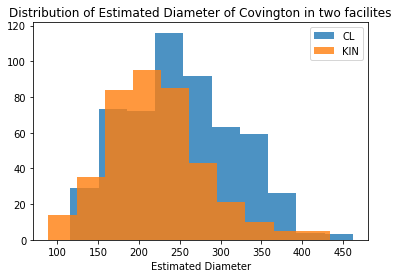

In [20]:
#creating a filter for getting only Covington sweetpotato
covington_mask=sp_data['clone'].str.contains('Covington')

diameter=sp_data[covington_mask]['estimateddiameter']

import matplotlib.pyplot as plt

plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('CL')]['estimateddiameter'],alpha=0.8)
plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('KIN')]['estimateddiameter'],alpha=0.8)
plt.legend(['CL','KIN'])
plt.title('Distribution of Estimated Diameter of Covington in two facilites')
plt.xlabel('Estimated Diameter')
plt.show()

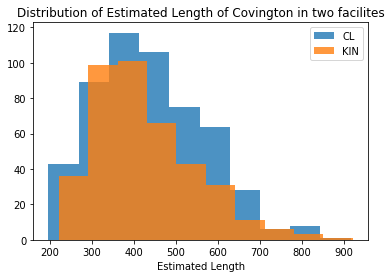

In [21]:

plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('CL')]['estimatedlength'],alpha=0.8)
plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('KIN')]['estimatedlength'],alpha=0.8)
plt.legend(['CL','KIN'])
plt.title('Distribution of Estimated Length of Covington in two facilites')
plt.xlabel('Estimated Length')
plt.show()

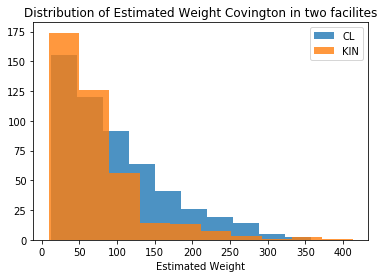

In [22]:

plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('CL')]['estimatedweight'],alpha=0.8)
plt.hist(sp_data[covington_mask & sp_data['location'].str.contains('KIN')]['estimatedweight'],alpha=0.8)
plt.legend(['CL','KIN'])
plt.title('Distribution of Estimated Weight Covington in two facilites')
plt.xlabel('Estimated Weight')
plt.show()

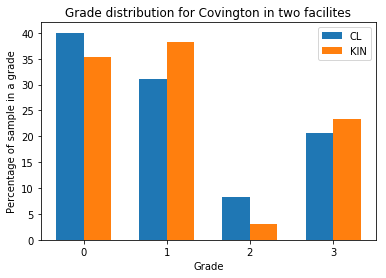

In [23]:
tmp=sp_data[covington_mask & sp_data['location'].str.contains('CL')][['location','gradeaftersize']]
tmp=tmp.groupby(['gradeaftersize']).count()
agg=tmp['location'].sum()
tmp['location']=tmp['location']*100/agg
#print(tmp)

wd=0.33
plt.bar(tmp.index-wd/2,tmp['location'],width=wd,alpha=1)

tmp=sp_data[covington_mask & sp_data['location'].str.contains('KIN')][['location','gradeaftersize']]
tmp=tmp.groupby(['gradeaftersize']).count()
agg=tmp['location'].sum()
tmp['location']=tmp['location']*100/agg
#print(tmp)
#plt.clf()
agg=tmp['location'].sum()
plt.bar(tmp.index+wd/2,tmp['location'],width=wd,alpha=1)
plt.xticks([0,1,2,3])
plt.xlabel('Grade')
plt.ylabel('Percentage of sample in a grade')
plt.legend(['CL','KIN'])
plt.title('Grade distribution for Covington in two facilites')
plt.show()

It seems that covington phenotypes and grade distribution is very similar across two locations. It is known that Covington is invariant to different abiotic stresses. However this should be verified through statistical analysis.  

It would be intersting to see how other cultivars behave in two farming facilites.